# Fuzzy C-Mean Cluster

## Konsep dasar fuzzy c-mean cluster

Konsep Dasar Fuzzy C-Means (FCM)

Apa itu Fuzzy C-Means?

Fuzzy C-Means (FCM) adalah metode **clustering** yang mirip dengan K-Means, tapi lebih fleksibel. Setiap data **boleh menjadi anggota lebih dari satu cluster** dengan derajat keanggotaan (nilai antara 0 dan 1).

---

 Bedanya dengan K-Means?

| K-Means              | Fuzzy C-Means                |
|----------------------|------------------------------|
| Data hanya masuk 1 cluster | Data bisa masuk beberapa cluster sekaligus |
| Keanggotaan bersifat mutlak (0 atau 1) | Keanggotaan bersifat fuzzy (0.0 – 1.0) |

---

📖 Konsep Inti FCM

1. Tentukan jumlah cluster `C`
2. Inisialisasi matriks keanggotaan `U` secara acak (ukuran: data × cluster)
3. Hitung centroid (pusat cluster) berdasarkan keanggotaan fuzzy
4. Update matriks keanggotaan berdasarkan jarak ke centroid
5. Ulangi sampai perubahan keanggotaan kecil (konvergen)

---

Bayangkan kita sedang makan **es campur**. Ada beberapa bahan: alpukat, cincau, kolang-kaling, dan kelapa muda.

kita mencoba mengelompokkan isi es campur ke dalam kategori:
- Buah
- Jelly
- Biji-bijian

Tapi... **alpukat** bisa masuk kategori *buah* (jelas), tapi **cincau** bisa masuk ke *buah* sedikit, dan *jelly* juga. Nah, di sini kita tidak bisa bilang "cincau hanya jelly" — dia bisa punya **derajat keanggotaan ke dua kategori**.

📌 **Fuzzy C-Means bekerja dengan cara seperti ini:**
- Tidak memaksa objek hanya milik 1 kategori
- Menghitung seberapa besar kemungkinan tiap objek masuk ke beberapa kelompok

---


 ## Algoritma fuzzy C-mean Cluster

---

 📥 Input:
- Dataset: \( X = \{x_1, x_2, ..., x_n\} \)
- Jumlah cluster: \( c \)
- Parameter fuzziness: \( m > 1 \) (biasanya \( m = 2 \))
- Toleransi error (konvergensi): \( \varepsilon \)
- Maksimal iterasi: `max_iter`

---

 🔄 Langkah-langkah Algoritma:

 1. Inisialisasi Matriks Keanggotaan Fuzzy \( U \)

Matriks keanggotaan awal diinisialisasi secara acak:

$$
u_{ij} \in [0, 1], \quad \text{dengan} \quad \sum_{j=1}^c u_{ij} = 1
$$

---

 2. Ulangi hingga konvergen:

 a. Hitung pusat cluster (centroid) ke-\( j \):

$$
c_j = \frac{\sum_{i=1}^n u_{ij}^m \cdot x_i}{\sum_{i=1}^n u_{ij}^m}
$$

---

 b. Update nilai keanggotaan fuzzy:

$$
u_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{||x_i - c_j||}{||x_i - c_k||} \right)^{\frac{2}{m-1}}}
$$

---

 c. Cek perubahan matriks \( U \):

Jika perubahan antar iterasi kecil (misalnya):

$$
max \left( | U^{(t+1)} - U^{(t)} | \right) <  varepsilon
$$

maka hentikan iterasi (konvergen).

---

 📤 Output:
- Matriks keanggotaan fuzzy: \( U = [u_{ij}] \)
- Pusat cluster: \( c_j \)
- Label akhir tiap data: berdasarkan \( \arg\max_j(u_{ij}) \)

---

 📌 Catatan Tambahan:

- Jarak yang digunakan umumnya adalah **jarak Euclidean**:

$$
||x_i - c_j|| = \sqrt{ \sum_{d=1}^{D} (x_{id} - c_{jd})^2 }
$$

- Parameter \( m \): mengontrol seberapa "fuzzy" hasilnya. Semakin besar \( m \), semakin buram (ambiguous) keanggotaannya.

---


## Contoh perhitungan manual FCM 2 clust

### 📘 Fuzzy C-Means Clustering (Manual) - Iterasi 1

 📊 Data

| xi | x1 | x2 |
|----|----|----|
| 1  | 1  | 2  |
| 2  | 2  | 3  |
| 3  | 3  | 4  |
| 4  | 6  | 7  |
| 5  | 7  | 8  |

 🧮 Matriks Keanggotaan Awal (U)

| xi | \(\mu_{i1}\) (dc1) | \(\mu_{i2}\) (dc2) |
|----|------------------|------------------|
| 1  | 0.3              | 0.7              |
| 2  | 0.2              | 0.8              |
| 3  | 0.4              | 0.6              |
| 4  | 0.7              | 0.3              |
| 5  | 0.1              | 0.9              |

Dengan:  
- Jumlah data: \( n = 5 \)  
- Jumlah cluster: \( c = 2 \)  
- Fuzzifier: \( m = 2 \)  

---

 📐 Rumus Centroid

Centroid untuk cluster ke-\( j \) adalah:

$$
v_j = \frac{\sum_{i=1}^{n} \left( \mu_{ij} \right)^m x_i}{\sum_{i=1}^{n} \left( \mu_{ij} \right)^m}
$$

---

 🔢 Perhitungan Centroid Cluster 1 (\(v_1\))

 Langkah 1: Hitung $$( (\mu_{i1})^2 )$$

$$
\mu_{i1}^2 = \{0.3^2, 0.2^2, 0.4^2, 0.7^2, 0.1^2\} = \{0.09, 0.04, 0.16, 0.49, 0.01\}
$$

 Langkah 2: Hitung $$( v_{1x1} )$$

$$
v_{1x1} = \frac{0.09 \cdot 1 + 0.04 \cdot 2 + 0.16 \cdot 3 + 0.49 \cdot 6 + 0.01 \cdot 7}{0.09 + 0.04 + 0.16 + 0.49 + 0.01}
$$

$$
= \frac{0.09 + 0.08 + 0.48 + 2.94 + 0.07}{0.79} = \frac{3.66}{0.79} \approx 4.63
$$

 Langkah 3: Hitung $$( v_{1x2} )$$

$$
v_{1x2} = \frac{0.09 \cdot 2 + 0.04 \cdot 3 + 0.16 \cdot 4 + 0.49 \cdot 7 + 0.01 \cdot 8}{0.79}
$$

$$
= \frac{0.18 + 0.12 + 0.64 + 3.43 + 0.08}{0.79} = \frac{4.45}{0.79} \approx 5.63
$$

 ✅ Hasil Centroid 1

$$
v_1 \approx (4.63,\ 5.63)
$$

---

 🧮 Perhitungan Centroid Cluster 2 ($$(v_2))$$

 Langkah 1: Hitung $$( (\mu_{i2})^2 )$$

$$
\mu_{i2}^2 = \{0.7^2, 0.8^2, 0.6^2, 0.3^2, 0.9^2\} = \{0.49, 0.64, 0.36, 0.09, 0.81\}
$$

 Langkah 2: Hitung $$( v_{2x1} )$$

$$
v_{2x1} = \frac{0.49 \cdot 1 + 0.64 \cdot 2 + 0.36 \cdot 3 + 0.09 \cdot 6 + 0.81 \cdot 7}{0.49 + 0.64 + 0.36 + 0.09 + 0.81}
$$

$$
= \frac{0.49 + 1.28 + 1.08 + 0.54 + 5.67}{2.39} = \frac{9.06}{2.39} \approx 3.79
$$

 Langkah 3: Hitung $$( v_{2x2} )$$

$$
v_{2x2} = \frac{0.49 \cdot 2 + 0.64 \cdot 3 + 0.36 \cdot 4 + 0.09 \cdot 7 + 0.81 \cdot 8}{2.39}
$$

$$
= \frac{0.98 + 1.92 + 1.44 + 0.63 + 6.48}{2.39} = \frac{11.45}{2.39} \approx 4.79
$$

 ✅ Hasil Centroid 2

$$
v_2 \approx (3.79,\ 4.79)
$$

---

 🧾 Ringkasan Centroid Iterasi 1

- $$( v_1 = (4.63,\ 5.63) )$$  
- $$( v_2 = (3.79,\ 4.79) )$$


### Langkah Selanjutnya: Update Keanggotaan dan Jarak

---

 1. Hitung Jarak Euclidean dari setiap data ke centroid

Rumus jarak data $$(x_i = (x_{i1}, x_{i2}) )$$ ke centroid cluster $$(v_j = (v_{j1}, v_{j2}) )$$ :

$$
d_{ij} = \sqrt{(x_{i1} - v_{j1})^2 + (x_{i2} - v_{j2})^2}
$$

---

 2. Contoh Hitung Jarak untuk Data ke-1 \( (1,2) \)

Dengan centroid cluster:

$$
v_1 = (4.63, 5.63), \quad v_2 = (3.79, 4.79)
$$

Jarak ke cluster 1:

$$
d_{11} = \sqrt{(1 - 4.63)^2 + (2 - 5.63)^2} = \sqrt{(-3.63)^2 + (-3.63)^2} = \sqrt{13.18 + 13.18} = \sqrt{26.36} \approx 5.13
$$

Jarak ke cluster 2:

$$
d_{12} = \sqrt{(1 - 3.79)^2 + (2 - 4.79)^2} = \sqrt{(-2.79)^2 + (-2.79)^2} = \sqrt{7.78 + 7.78} = \sqrt{15.56} \approx 3.94
$$

---

 3. Update Keanggotaan Baru

Rumus update keanggotaan:

$$
\mu_{ij} = \frac{1}{\sum_{k=1}^{c} \left( \frac{d_{ij}}{d_{ik}} \right)^{\frac{2}{m-1}}}
$$

Misalkan \( m=2 \) dan \( c=2 \), maka untuk data ke-1 cluster 1:

$$
\mu_{11} = \frac{1}{\left( \frac{d_{11}}{d_{11}} \right)^2 + \left( \frac{d_{11}}{d_{12}} \right)^2} = \frac{1}{1 + \left( \frac{5.13}{3.94} \right)^2} = \frac{1}{1 + 1.69} = \frac{1}{2.69} \approx 0.37
$$

Untuk cluster 2:

$$
\mu_{12} = \frac{1}{\left( \frac{d_{12}}{d_{11}} \right)^2 + \left( \frac{d_{12}}{d_{12}} \right)^2} = \frac{1}{\left( \frac{3.94}{5.13} \right)^2 + 1} = \frac{1}{0.59 + 1} = \frac{1}{1.59} \approx 0.63
$$

---

 4. Ulangi untuk semua data dan cluster

Lakukan perhitungan jarak dan update keanggotaan ini untuk seluruh data dan cluster.

---

 5. Cek konvergensi

Jika perubahan keanggotaan sudah kecil, proses berhenti. Jika belum, ulangi hitung centroid baru dan update keanggotaan sampai konvergen.


### Data dan Keanggotaan Fuzzy

| Data $(x_i)$ | $(x_1)$ | $(x_2) $ | $(\mu_{i1}) $ | $(\mu_{i2}) $ |
|--------------|---------|---------|--------------|--------------|
| 1            | 1       | 2       | 0.3          | 0.7          |
| 2            | 2       | 3       | 0.2          | 0.8          |
| 3            | 3       | 4       | 0.4          | 0.6          |
| 4            | 6       | 7       | 0.7          | 0.3          |
| 5            | 7       | 8       | 0.1          | 0.9          |

---

 Menentukan Cluster Akhir

Cluster akhir untuk data $$(x_i)$$ adalah cluster dengan nilai keanggotaan fuzzy terbesar:

$$
\text{Cluster akhir untuk data } x_i = \arg\max_{j} \mu_{ij}
$$

---

 Hasil Perhitungan Cluster Akhir

| Data $(x_i)$ | $(\mu_{i1})$ | $(\mu_{i2})$ | Cluster Akhir |
|--------------|--------------|--------------|---------------|
| 1            | 0.3          | 0.7          | 2             |
| 2            | 0.2          | 0.8          | 2             |
| 3            | 0.4          | 0.6          | 2             |
| 4            | 0.7          | 0.3          | 1             |
| 5            | 0.1          | 0.9          | 2             |


## Implementasi Python FCM
### Tampilkan nilai pusat cluster Setiap iterasi dan keanggotaan setiap literasi dan hitung fungsi objektif setiap titrasi

In [4]:
import numpy as np

# Data (x1, x2)
data = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [6, 7],
    [7, 8]
], dtype=float)

# Keanggotaan fuzzy mu_ij untuk 2 cluster
U = np.array([
    [0.3, 0.7],
    [0.2, 0.8],
    [0.4, 0.6],
    [0.7, 0.3],
    [0.1, 0.9]
], dtype=float)

m = 2.0  # derajat fuzziness
epsilon = 0.01
max_iter = 100

# Update centroid untuk data 2D
def update_centroids(U, data, m):
    um = U ** m  # (n, c)
    centroids = np.dot(um.T, data) / um.sum(axis=0)[:, None]  # (c, 2)
    return centroids

# Update keanggotaan fuzzy untuk data 2D
def update_membership(data, centroids, m):
    n = data.shape[0]
    c = centroids.shape[0]
    new_U = np.zeros((n, c))
    for i in range(n):
        for j in range(c):
            d_ij = np.linalg.norm(data[i] - centroids[j]) + 1e-10
            denom = sum([
                (d_ij / (np.linalg.norm(data[i] - centroids[k]) + 1e-10)) ** (2 / (m - 1))
                for k in range(c)
            ])
            new_U[i, j] = 1 / denom
    return new_U

# Fungsi objektif untuk data 2D
def objective_function(U, data, centroids, m):
    J = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            dist_sq = np.linalg.norm(data[i] - centroids[j]) ** 2
            J += (U[i][j] ** m) * dist_sq
    return J

# Iterasi algoritma Fuzzy C-Means
for iteration in range(max_iter):
    centroids = update_centroids(U, data, m)
    new_U = update_membership(data, centroids, m)
    J = objective_function(new_U, data, centroids, m)
    delta_U = np.max(np.abs(new_U - U))

    print(f"Iterasi {iteration + 1}")
    print("Centroid:\n", np.round(centroids, 4))
    print("Matriks Keanggotaan (U):\n", np.round(new_U, 4))
    print("Fungsi Objektif (J):", round(J, 4))
    print("Perubahan Maksimum Delta U:", round(delta_U, 6))
    print("-" * 40)

    if delta_U < epsilon:
        print(f"✅ Konvergen pada iterasi ke-{iteration + 1}")
        break

    U = new_U
else:
    print("❌ Tidak konvergen hingga iterasi maksimum.")


Iterasi 1
Centroid:
 [[4.6329 5.6329]
 [3.7908 4.7908]]
Matriks Keanggotaan (U):
 [[0.3711 0.6289]
 [0.3163 0.6837]
 [0.19   0.81  ]
 [0.7231 0.2769]
 [0.6476 0.3524]]
Fungsi Objektif (J): 25.155
Perubahan Maksimum Delta U: 0.54765
----------------------------------------
Iterasi 2
Centroid:
 [[5.3606 6.3606]
 [2.6908 3.6908]]
Matriks Keanggotaan (U):
 [[0.1307 0.8693]
 [0.0405 0.9595]
 [0.0169 0.9831]
 [0.964  0.036 ]
 [0.8736 0.1264]]
Fungsi Objektif (J): 11.5579
Perubahan Maksimum Delta U: 0.275753
----------------------------------------
Iterasi 3
Centroid:
 [[6.3916 7.3916]
 [2.1113 3.1113]]
Matriks Keanggotaan (U):
 [[4.070e-02 9.593e-01]
 [6.000e-04 9.994e-01]
 [6.430e-02 9.357e-01]
 [9.900e-01 1.000e-02]
 [9.848e-01 1.520e-02]]
Fungsi Objektif (J): 4.9047
Perubahan Maksimum Delta U: 0.111187
----------------------------------------
Iterasi 4
Centroid:
 [[6.4853 7.4853]
 [1.9846 2.9846]]
Matriks Keanggotaan (U):
 [[0.0312 0.9688]
 [0.     1.    ]
 [0.0782 0.9218]
 [0.9856 0.0144

## Implementasi FCM untuk data iris (3 Cluster)

### **inisialisasi Data Iris dan Parameter**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Fungsi ambil data Iris dan atur ulang kolom
def get_iris_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["class"] = pd.Categorical.from_codes(iris.target, iris.target_names)
    df["id"] = df.index + 1  # ID dimulai dari 1

    # Susun ulang kolom: id, class, lalu fitur
    columns_order = ["id", "class"] + iris.feature_names
    df = df[columns_order]
    return df

# Ambil data
df_iris = get_iris_data()

# Muat data Iris
iris = load_iris()
X = iris.data  # Semua fitur: shape (150, 4)
feature_names = iris.feature_names

# Cetak tanpa indeks
print(df_iris.to_string(index=False))

# Parameter FCM
k = 3                  # Jumlah cluster
m = 2.0                # Derajat fuzziness
max_iter = 100         # Maksimum iterasi
epsilon = 0.01         # Ambang batas konvergensi
n = X.shape[0]         # Jumlah data (150)
d = X.shape[1]         # Jumlah fitur (4)

# Inisialisasi keanggotaan acak (jumlah baris = data, kolom = cluster)
U = np.random.dirichlet(np.ones(k), size=n)

print()
# Cetak semua parameter
print("📌 Parameter FCM:")
print(f"Jumlah data (n)        : {n}")
print(f"Jumlah fitur (d)       : {d} ({', '.join(feature_names)})")
print(f"Jumlah cluster (k)     : {k}")
print(f"Fuzziness (m)          : {m}")
print(f"Maksimum iterasi       : {max_iter}")
print(f"Ambang konvergensi     : {epsilon}")
print(f"Shape matriks keanggotaan U: {U.shape}")

 id      class  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
  1     setosa                5.1               3.5                1.4               0.2
  2     setosa                4.9               3.0                1.4               0.2
  3     setosa                4.7               3.2                1.3               0.2
  4     setosa                4.6               3.1                1.5               0.2
  5     setosa                5.0               3.6                1.4               0.2
  6     setosa                5.4               3.9                1.7               0.4
  7     setosa                4.6               3.4                1.4               0.3
  8     setosa                5.0               3.4                1.5               0.2
  9     setosa                4.4               2.9                1.4               0.2
 10     setosa                4.9               3.1                1.5               0.1
 11     setosa       

### Inisialisasi derajat keanggotaan

In [6]:
# Tambahkan ID ke matriks keanggotaan dan pindahkan ke kolom paling kiri
df_U = pd.DataFrame(U, columns=[f"Cluster_{i+1}" for i in range(k)])
df_U.insert(0, "id", df_U.index + 1)  # ID dimulai dari 1
print("\n=== Matriks Keanggotaan Awal (U) ===")
print(df_U.to_string(index=False))



=== Matriks Keanggotaan Awal (U) ===
 id  Cluster_1  Cluster_2  Cluster_3
  1   0.184800   0.413638   0.401562
  2   0.005391   0.430574   0.564036
  3   0.111411   0.583887   0.304702
  4   0.265723   0.243816   0.490461
  5   0.318157   0.563212   0.118630
  6   0.751164   0.225759   0.023077
  7   0.768419   0.119029   0.112552
  8   0.106106   0.535420   0.358474
  9   0.268683   0.543093   0.188224
 10   0.488235   0.100574   0.411190
 11   0.000301   0.489337   0.510362
 12   0.013831   0.265902   0.720267
 13   0.457004   0.268263   0.274732
 14   0.410356   0.255571   0.334073
 15   0.121551   0.461794   0.416654
 16   0.078666   0.604825   0.316509
 17   0.288498   0.103782   0.607721
 18   0.308324   0.491141   0.200535
 19   0.148279   0.743526   0.108195
 20   0.451228   0.173411   0.375361
 21   0.456340   0.080040   0.463620
 22   0.857792   0.042718   0.099490
 23   0.077803   0.113586   0.808611
 24   0.565346   0.208196   0.226458
 25   0.732927   0.243423   0.023649


### Hitung Centroid berdasarkan matriks keanggotaan U

In [7]:
def calculate_centroids(X, U, m):
    um = U ** m
    centroids = (um.T @ X) / np.sum(um.T, axis=1)[:, None]
    return centroids

centroids = calculate_centroids(X, U, m)

print("=== Centroid Awal (Iterasi ke-1) ===")
for i, centroid in enumerate(centroids):
    print(f"Centroid Cluster {i+1}: {centroid}")


=== Centroid Awal (Iterasi ke-1) ===
Centroid Cluster 1: [5.89032185 3.04691924 3.82577075 1.23702358]
Centroid Cluster 2: [5.84603796 3.09892604 3.73484504 1.18578307]
Centroid Cluster 3: [5.78229531 3.03832647 3.74223787 1.21050922]


### Update matrix keanggotaan U

In [9]:
def update_membership(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U_new = np.zeros((n, c))
    for i in range(n):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        for j in range(c):
            denom = np.sum((distances[j] / distances) ** (2 / (m - 1)))
            U_new[i, j] = 1 / denom
    return U_new

# Perbarui keanggotaan
U_new = update_membership(X, centroids, m)

# Buat DataFrame dan atur urutan kolom (id di paling kiri)
df_U_new = pd.DataFrame(U_new, columns=[f"Cluster_{i+1}" for i in range(k)])
df_U_new.insert(0, "id", df_U_new.index + 1)  # Tambahkan ID di kolom pertama

# Cetak hasil
print("=== Matriks Keanggotaan Baru (Setelah Iterasi ke-1) ===")
print(df_U_new.to_string(index=False))


=== Matriks Keanggotaan Baru (Setelah Iterasi ke-1) ===
 id  Cluster_1  Cluster_2  Cluster_3
  1   0.314970   0.343595   0.341435
  2   0.315075   0.341504   0.343421
  3   0.315591   0.341355   0.343053
  4   0.314617   0.341123   0.344260
  5   0.315029   0.343515   0.341456
  6   0.313710   0.346711   0.339579
  7   0.314896   0.341776   0.343329
  8   0.314190   0.343381   0.342429
  9   0.315803   0.339747   0.344450
 10   0.314611   0.342079   0.343310
 11   0.315061   0.345233   0.339706
 12   0.313615   0.342984   0.343401
 13   0.315383   0.341227   0.343390
 14   0.317424   0.339527   0.343049
 15   0.318571   0.344773   0.336656
 16   0.317864   0.346099   0.336037
 17   0.316331   0.344668   0.339001
 18   0.314720   0.343628   0.341652
 19   0.314721   0.347259   0.338020
 20   0.314564   0.344593   0.340843
 21   0.313195   0.345515   0.341290
 22   0.314107   0.344464   0.341429
 23   0.317312   0.341335   0.341353
 24   0.311708   0.344201   0.344091
 25   0.311483   0.

### Hitung fungsi objektif dan cek konvergen

=== Fungsi Objektif (J) Iterasi ke-1 ===
J = 226.8462

Perubahan matriks keanggotaan (delta) = 4.946628
❌ Belum konvergen, lanjut ke iterasi berikutnya.


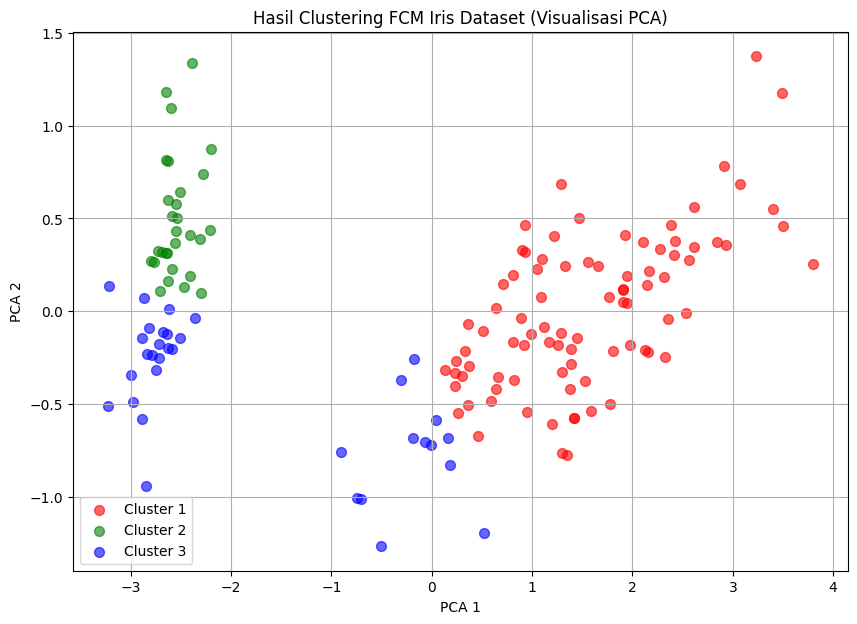

In [10]:
# Fungsi objektif
def objective_function(X, U, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    J = 0
    for i in range(n):
        for j in range(c):
            dist = np.linalg.norm(X[i] - centroids[j])
            J += (U[i, j] ** m) * (dist ** 2)
    return J

J = objective_function(X, U_new, centroids, m)
print(f"=== Fungsi Objektif (J) Iterasi ke-1 ===\nJ = {J:.4f}")

# Cek konvergensi
epsilon = 0.01
delta = np.linalg.norm(U_new - U)
print(f"\nPerubahan matriks keanggotaan (delta) = {delta:.6f}")

if delta < epsilon:
    print("✅ Matriks keanggotaan sudah konvergen (berhenti iterasi).")
else:
    print("❌ Belum konvergen, lanjut ke iterasi berikutnya.")

# Lakukan PCA untuk mereduksi fitur dari 4 ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tentukan cluster dengan keanggotaan tertinggi tiap data (hard clustering)
cluster_labels = np.argmax(U_new, axis=1)

# Plot data hasil PCA, warna berdasarkan cluster
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']

for i in range(k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i+1}', alpha=0.6, s=50, color=colors[i])

plt.title("Hasil Clustering FCM Iris Dataset (Visualisasi PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()



**Karena dari perhitungan diatas belum mencapai konvergensi maka Akan dilakukan perhitungan ulang pada iterasi hingga mencapai konvergensi**

In [11]:
# === Fungsi bantu ===
def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def calculate_centroids(X, U, m):
    um = U ** m
    centroids = (um.T @ X) / np.sum(um.T, axis=1)[:, None]
    return centroids

def update_membership(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U_new = np.zeros((n, c))
    for i in range(n):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        for j in range(c):
            denom = np.sum((distances[j] / distances) ** (2 / (m - 1)))
            U_new[i, j] = 1 / denom
    return U_new

def objective_function(X, U, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    J = 0
    for i in range(n):
        for j in range(c):
            dist = np.linalg.norm(X[i] - centroids[j])
            J += (U[i, j] ** m) * (dist ** 2)
    return J

# === Load data Iris ===
iris = load_iris()
X = iris.data
n, d = X.shape
k = 3
m = 2
epsilon = 0.01
max_iter = 100
np.random.seed(42)

# Inisialisasi keanggotaan acak (dengan baris = data, kolom = cluster)
U = np.random.dirichlet(np.ones(k), size=n)

# === Iterasi ===
for iteration in range(1, max_iter + 1):
    print(f"\n====== ITERASI KE-{iteration} ======")

    # Hitung centroid
    centroids = calculate_centroids(X, U, m)
    print("\n📌 Centroid:")
    for idx, c in enumerate(centroids):
        print(f"Cluster {idx+1}: {c}")

    # Update keanggotaan
    U_new = update_membership(X, centroids, m)

    print("\n📌 Matriks Keanggotaan (5 data pertama):")
    df_U_new = pd.DataFrame(U_new, columns=[f"C{i+1}" for i in range(k)])
    print(df_U_new.head().to_string(index=False))

    # Hitung fungsi objektif
    J = objective_function(X, U_new, centroids, m)
    print(f"\n📌 Fungsi Objektif (J): {J:.6f}")

    # Cek konvergensi
    delta = np.linalg.norm(U_new - U)
    print(f"📌 Perubahan keanggotaan (delta): {delta:.6f}")
    if delta < epsilon:
        print("\n✅ Konvergensi tercapai. Iterasi dihentikan.")
        break

    U = U_new  # simpan untuk iterasi berikutnya

# === Hasil akhir ===
print("\n======== HASIL AKHIR ========")
print("📌 Centroid akhir:")
for idx, c in enumerate(centroids):
    print(f"Cluster {idx+1}: {c}")

print("\n📌 Keanggotaan akhir (5 data pertama):")
print(df_U_new.head().to_string(index=False))

print(f"\n📌 Fungsi Objektif akhir: {J:.6f}")



====== ITERASI KE-1 ======

📌 Centroid:
Cluster 1: [6.06673919 3.00422155 4.16771426 1.37476747]
Cluster 2: [5.85048499 3.06034261 3.8023977  1.20959388]
Cluster 3: [5.63287974 3.1153372  3.26640646 0.99226272]

📌 Matriks Keanggotaan (5 data pertama):
      C1       C2       C3
0.217205 0.294142 0.488653
0.218217 0.294863 0.486920
0.223350 0.298084 0.478566
0.219065 0.296063 0.484872
0.218886 0.295383 0.485731

📌 Fungsi Objektif (J): 207.462652
📌 Perubahan keanggotaan (delta): 5.720933

====== ITERASI KE-2 ======

📌 Centroid:
Cluster 1: [6.21068093 2.95698086 4.64895615 1.56593278]
Cluster 2: [5.82662119 3.00516876 3.82861947 1.22327775]
Cluster 3: [5.2690505  3.25460263 2.26381149 0.58115577]

📌 Matriks Keanggotaan (5 data pertama):
      C1       C2       C3
0.058691 0.106079 0.835230
0.063467 0.115005 0.821528
0.072616 0.128017 0.799367
0.067576 0.121863 0.810561
0.062521 0.112008 0.825470

📌 Fungsi Objektif (J): 123.393639
📌 Perubahan keanggotaan (delta): 4.076931

====== ITERASI 

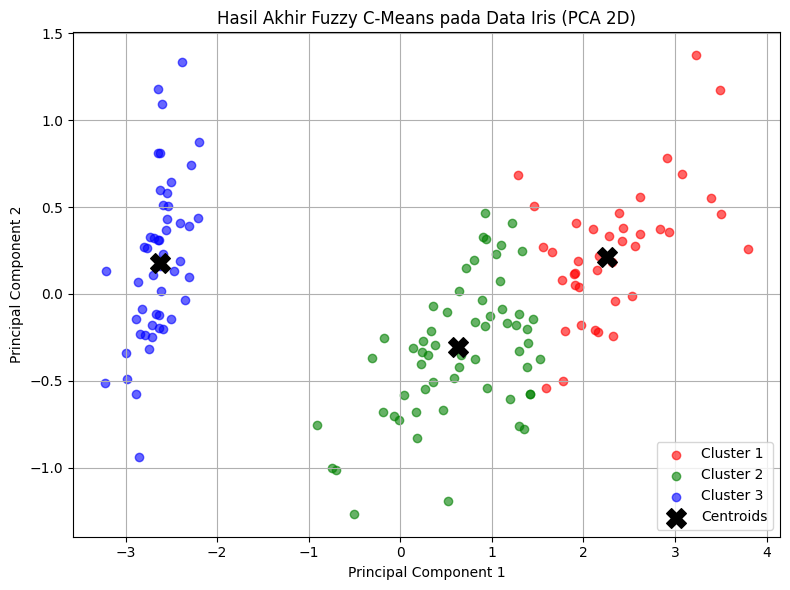

In [12]:
# Reduksi dimensi data asli ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tentukan label cluster berdasarkan nilai keanggotaan maksimum
labels = np.argmax(U, axis=1)

# Transformasi centroid ke ruang PCA
centroids_pca = pca.transform(centroids)

# Plot data dengan warna berdasarkan cluster
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1],
                color=colors[i], alpha=0.6, label=f'Cluster {i+1}')

# Plot centroid
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            color='black', marker='X', s=200, label='Centroids')

plt.title('Hasil Akhir Fuzzy C-Means pada Data Iris (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
